#  

# **Classifying Flowers with Tensorflow**
####**Presented by MacAI**

---

In this demo we will utilize Tensorflow to categorize images into 5 different types of flowers.


**1. Import Required Libraries**

In [ ]:
# importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib

**2. Load the Image Dataset**

In [ ]:
# load the image dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


**3. Preview Images from the Dataset**

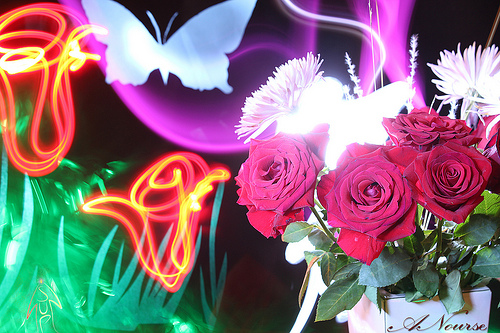

In [ ]:
# preview images from the dataset
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))



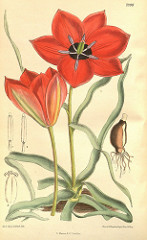

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**4. Define Parameters**

In [ ]:
# define parameters
batch_size = 32
img_height = 180
img_width = 180

**5. Split Dataset Into Training/Testing Data**

In [ ]:
# split training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# split testing data
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# view class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**6. Preview Training Images**

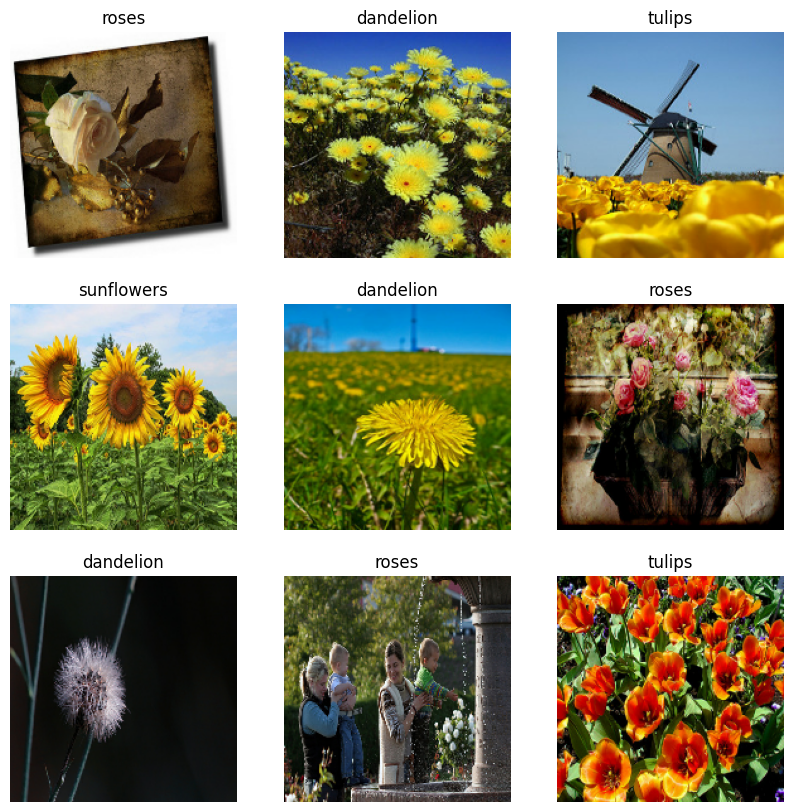

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**6. Configure the Dataset for Performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**7. Standarize the Data**

In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]



**8. Create the Model**

In [ ]:
num_classes = len(class_names)

model = Sequential(
    [
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    ]
)

**9. Compile the Model**

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**10. Train the Model**

In [ ]:
epochs=7
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/5
92/92 [==============================] - 104s 1s/step - loss: 1.2887 - accuracy: 0.4601 - val_loss: 1.0337 - val_accuracy: 0.5940
Epoch 2/5
92/92 [==============================] - 97s 1s/step - loss: 0.9986 - accuracy: 0.6049 - val_loss: 0.9365 - val_accuracy: 0.6308
Epoch 3/5
92/92 [==============================] - 94s 1s/step - loss: 0.8460 - accuracy: 0.6788 - val_loss: 0.8859 - val_accuracy: 0.6485
Epoch 4/5
92/92 [==============================] - 96s 1s/step - loss: 0.6138 - accuracy: 0.7718 - val_loss: 0.9017 - val_accuracy: 0.6526
Epoch 5/5
92/92 [==============================] - 94s 1s/step - loss: 0.4242 - accuracy: 0.8495 - val_loss: 1.0140 - val_accuracy: 0.6621


**11. Visualize Training Results**

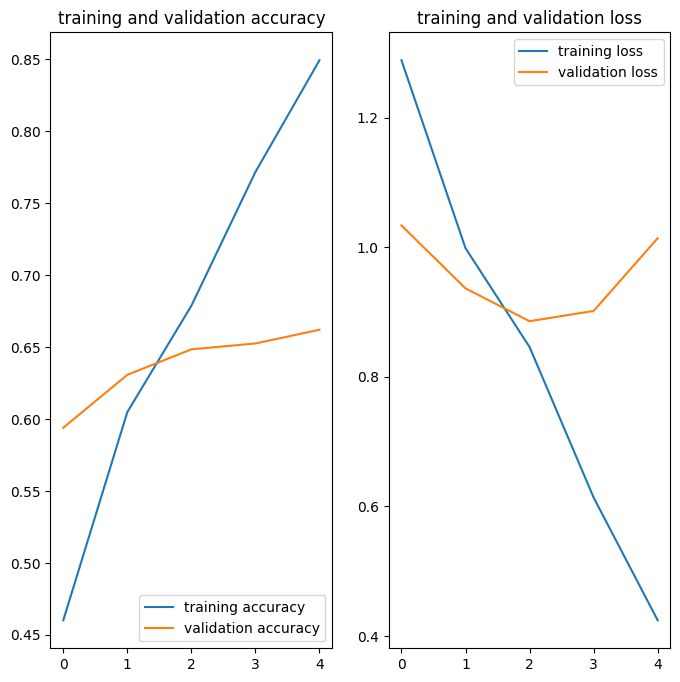

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range  = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label="validation accuracy")
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

**12. Try Model on Example Image**

In [ ]:
sunflower_url = "https://www.1800flowers.com/blog/wp-content/uploads/2017/03/single-red-rose.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 47ms/step
This image most likely belongs to roses with a 72.84 percent confidence.
